# Tutorial of how to use Privugger
This is a tutorial of how to use the Privugger package. 
A tool made to assist a data analyst to automatically asses the vulnerability of a privacy protection mechanism.


## Imports

In [1]:
from privugger.attacker import simulate
from privugger.transformer.type_decoration import load
from privugger.measures.mutual_information import mi_sklearn
from typing import *
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
with pm.Model() as model:
    x=pm.Uniform('x',0,100)
    y=pm.Uniform('y',0,100,shape=20)
    o=pm.Deterministic('o',(x+y.sum())/(21))
    trace=pm.sample(10000)

<ipython-input-2-b5632e558a51>:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace=pm.sample(10000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y, x]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 13 seconds.


/home/pardo/.local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


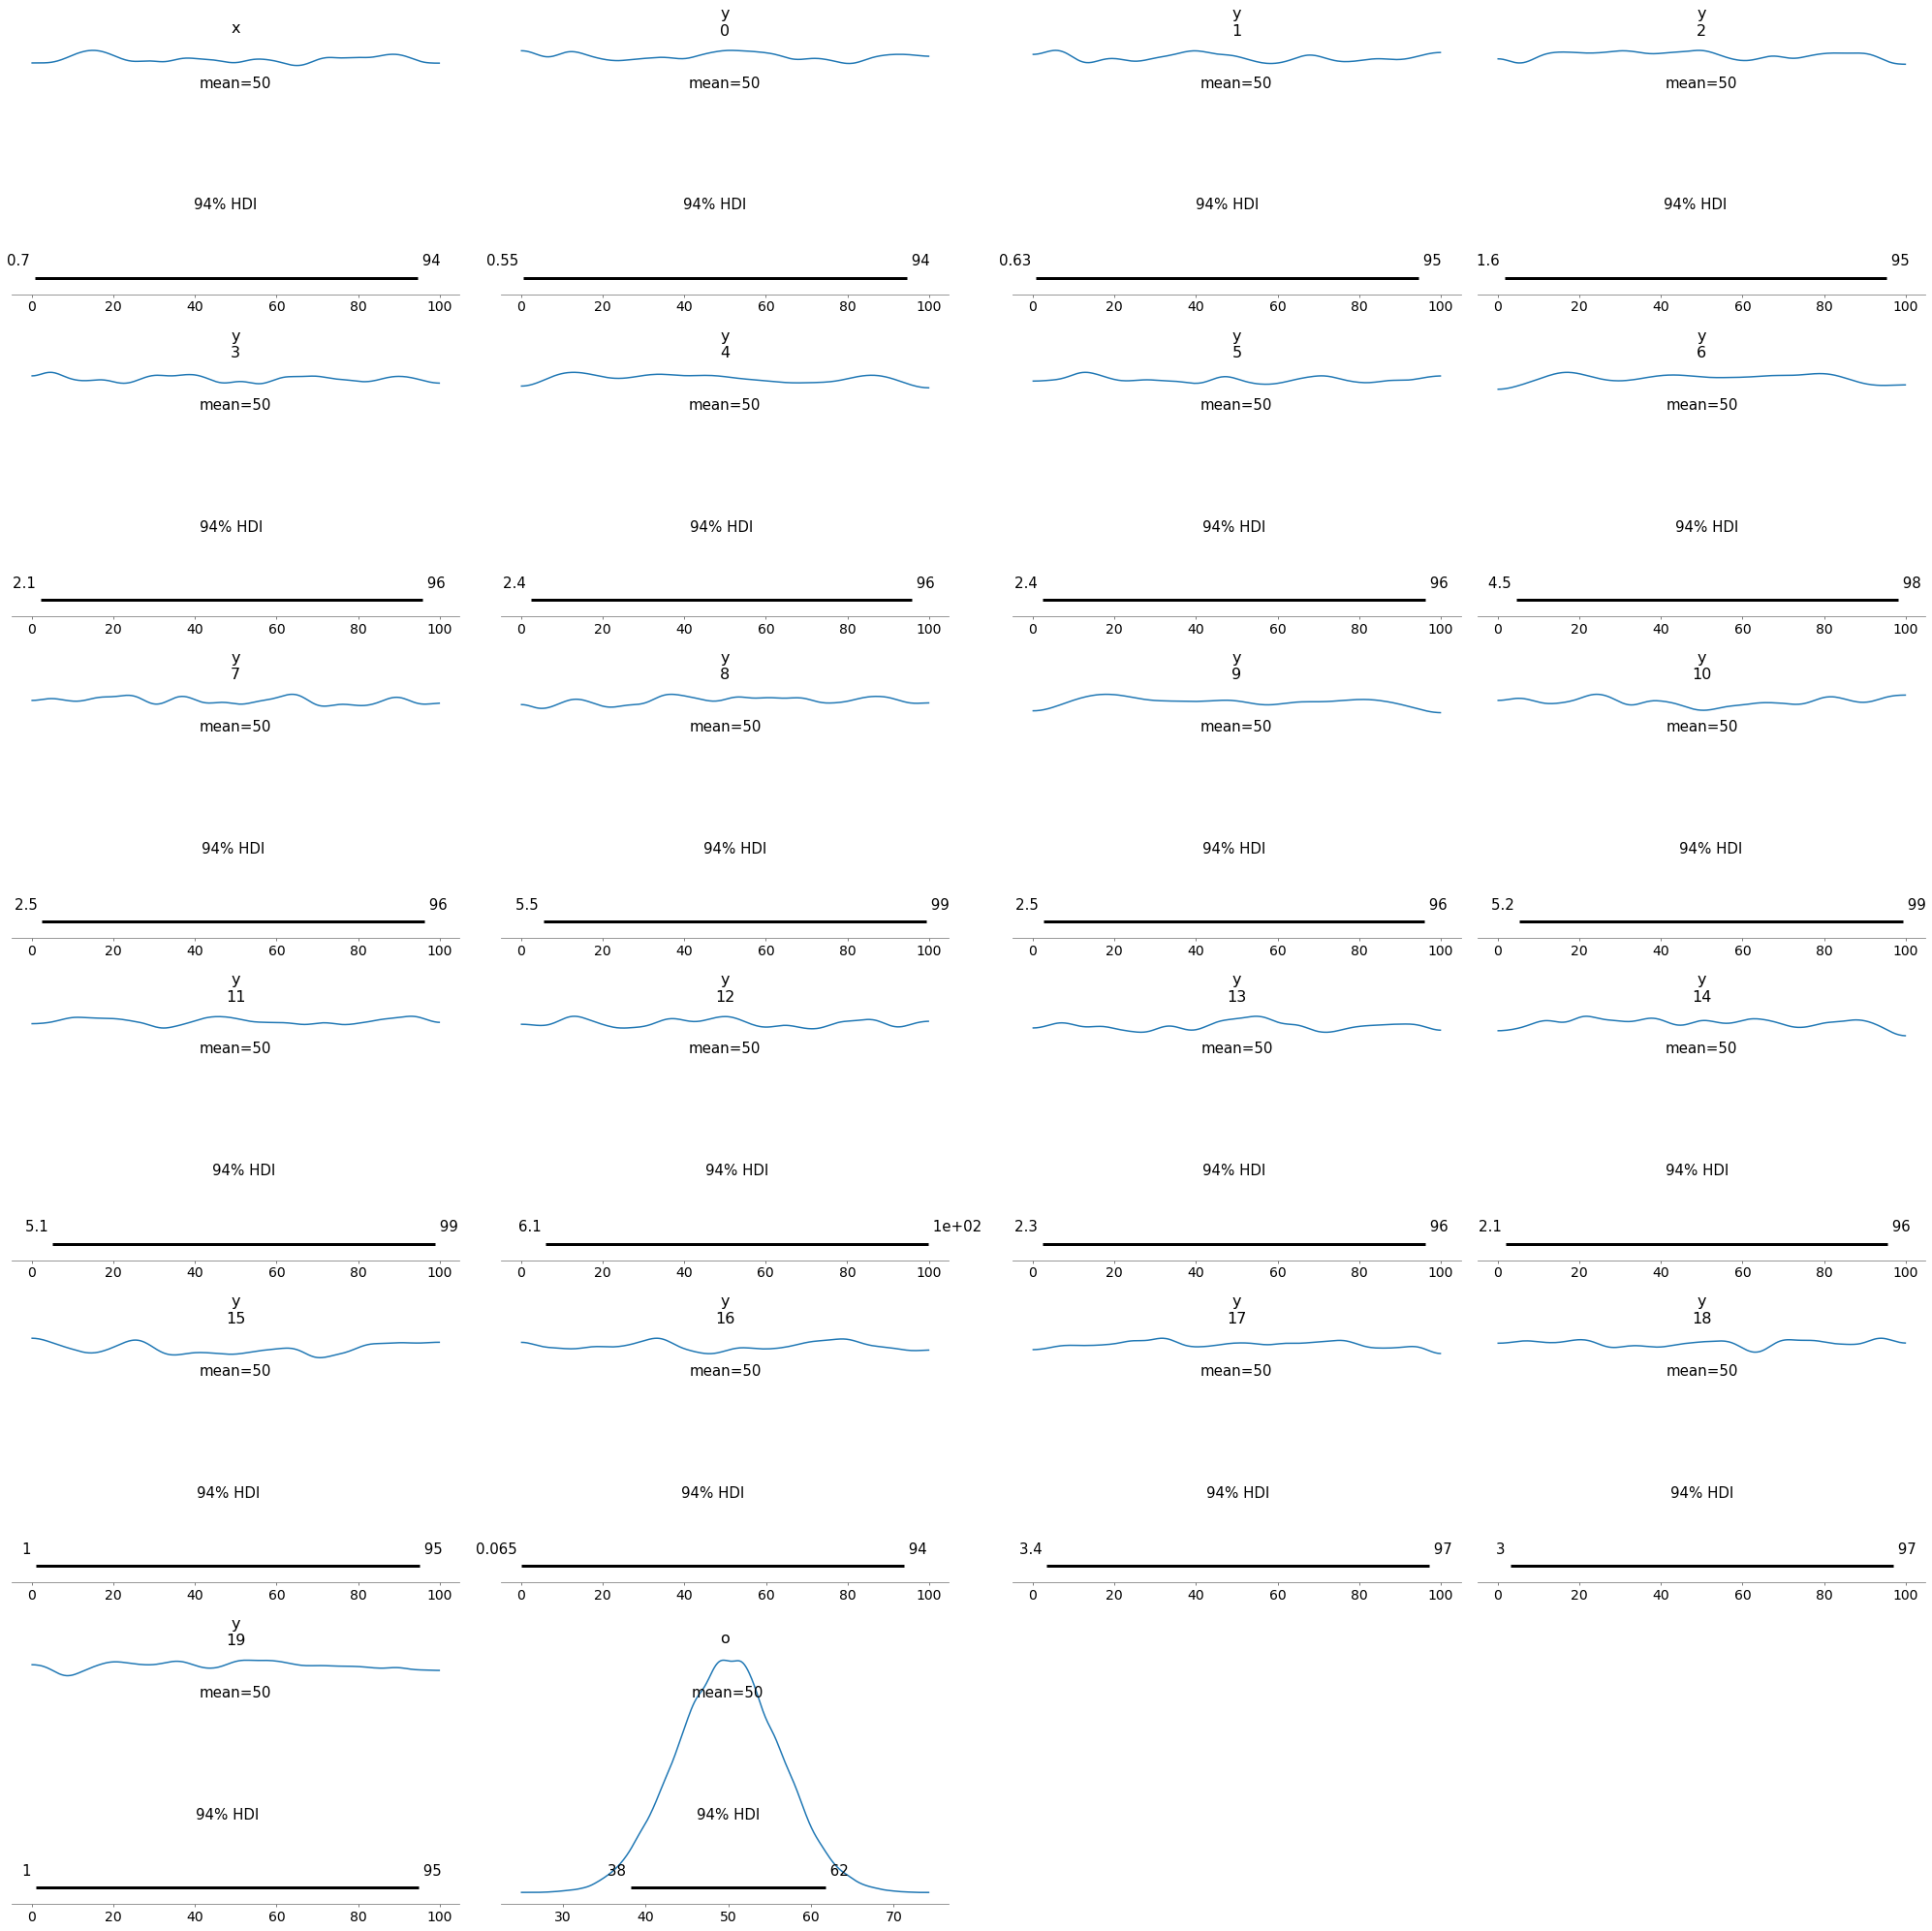

In [3]:
mi_sklearn(trace['x'],trace['o'])
pm.plot_posterior(trace);

## Define the method
IMPORTANT! Remember to add type annotation to your method using the tool `typing`

In [49]:
def privacy_protection_mechanism(a: int) -> int:
    secret = 1024
    res = a == 1024
    return res

Since the program currently loads from a file, you can either manually place the function in the file `program_to_be_analysed.py` or use the code below

In [50]:
import inspect
with open("program_to_be_analysed.py", "w") as f:
    f.write("from typing import * \n \n \n")
    f.write(inspect.getsource(privacy_protection_mechanism))

## Lift the program to a probability monad
By the use of the transformer plugin the program will be analysed and converted to a method that works on probability distributions

After this step a function called `method(...)` exist

In [51]:
lifted_program = load("program_to_be_analysed.py", "privacy_protection_mechanism")
exec(astor.to_source(lifted_program))

import theano
import theano.tensor as tt
import numpy as np
from functools import reduce
from typing import List, Tuple


def method(a: int) ->int:

    @theano.compile.ops.as_op(itypes=[tt.lscalar], otypes=[tt.lscalar])
    def privacy_protection_mechanism(a: int) ->int:
        secret = 1024
        res = a == 1024
        return np.int64(res)
    return privacy_protection_mechanism(a)



## Simulate attackers on the method
This step is done to find the most vulnerable attackers

In [54]:
results = simulate(method, max_examples=20, num_samples=1000, ranges=[(1000, 1050)])

/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The number of effective samples is smaller than 25% for some parameters.
/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The number of effective samples is smaller than 25% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.
/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 25% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 0 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Only 100 samples in chain.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


# Plotting the results

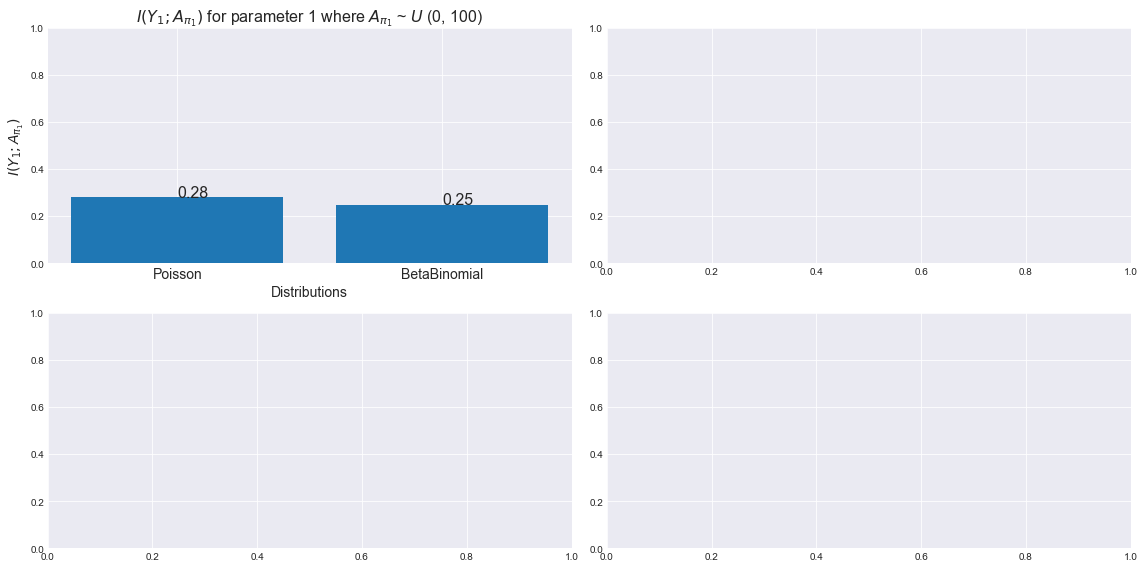

In [55]:
results.plot_mutual_information()